# **Case Study 3.1**
In this case study, you will perform essential data preprocessing steps on the Penguins dataset. The dataset contains information about different species of penguins, including their physical characteristics and the region where they were observed. Your goal is to prepare the dataset for machine learning analysis. Follow these steps:
1. Load the penguins dataset using the code snippet provided below.
2. Perform initial data exploration to understand the dataset's structure, features, and any missing values. Summarize the dataset's statistics and gain insights into the data.
3. Address any data quality issues, such as missing values and outliers. Decide on an appropriate strategy for handling missing data, such as imputation or removal of rows/columns.
4. Analyze the relevance of each feature for your machine learning task by using the learned use feature selection technques.
5. If the dataset contains categorical variables, encode them into a numerical format suitable for machine learning models.
6. Split the dataset into training and testing subsets to evaluate the performance of your machine learning models.
7. Scale or normalize the numerical features to ensure consistent scaling across variables.
8. Apply suitable dimensionality reduction techniques to reduce the size of the data while preserving important information.
9. Validate your preprocessing pipeline by training and evaluating a machine learning model, such as the Random Forest model, on the preprocessed data. Compare the results to the model trained on the raw data (before feature filtering, transformation, and reduction) to ensure that preprocessing has improved model performance.







In [ ]:
!pip install -r requirements.txt

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from feature_engine.discretisation import EqualFrequencyDiscretiser


In [3]:
# Load the penguins dataset and store it in the 'df' DataFrame
df = sns.load_dataset('penguins')

# Display the first few rows of the DataFrame to get an initial look at the data
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Data Exploration, Visualization, and Statistics

In [4]:
df.shape

(344, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Values for '{column}': {df[column].unique()}")


Values for 'species': ['Adelie' 'Chinstrap' 'Gentoo']
Values for 'island': ['Torgersen' 'Biscoe' 'Dream']
Values for 'sex': ['Male' 'Female' nan]


In [8]:
df[df['sex'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


<Axes: ylabel='count'>

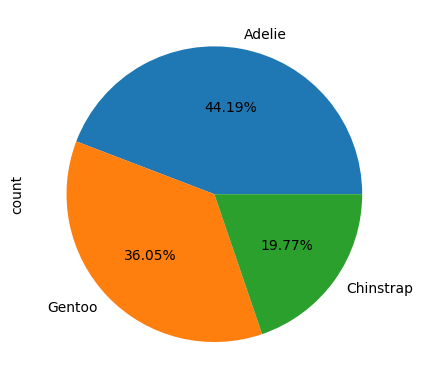

In [9]:
species = df.species.value_counts()
species.plot(kind='pie',autopct="%.2f%%")

<Axes: ylabel='count'>

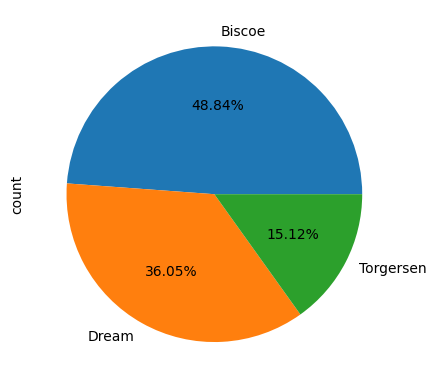

In [10]:
island = df.island.value_counts()
island.plot(kind='pie',autopct="%.2f%%")

<Axes: xlabel='sex', ylabel='count'>

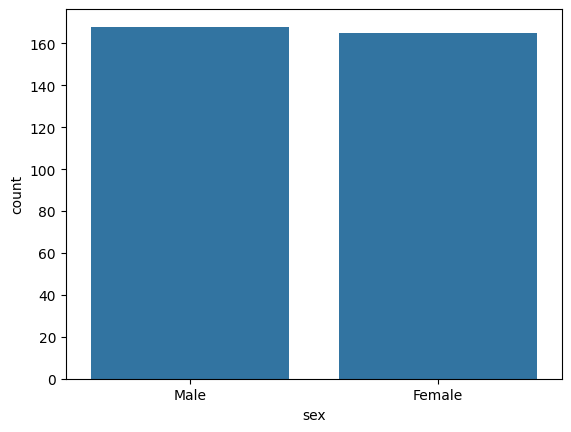

In [11]:
sns.countplot(data=df, x='sex') 

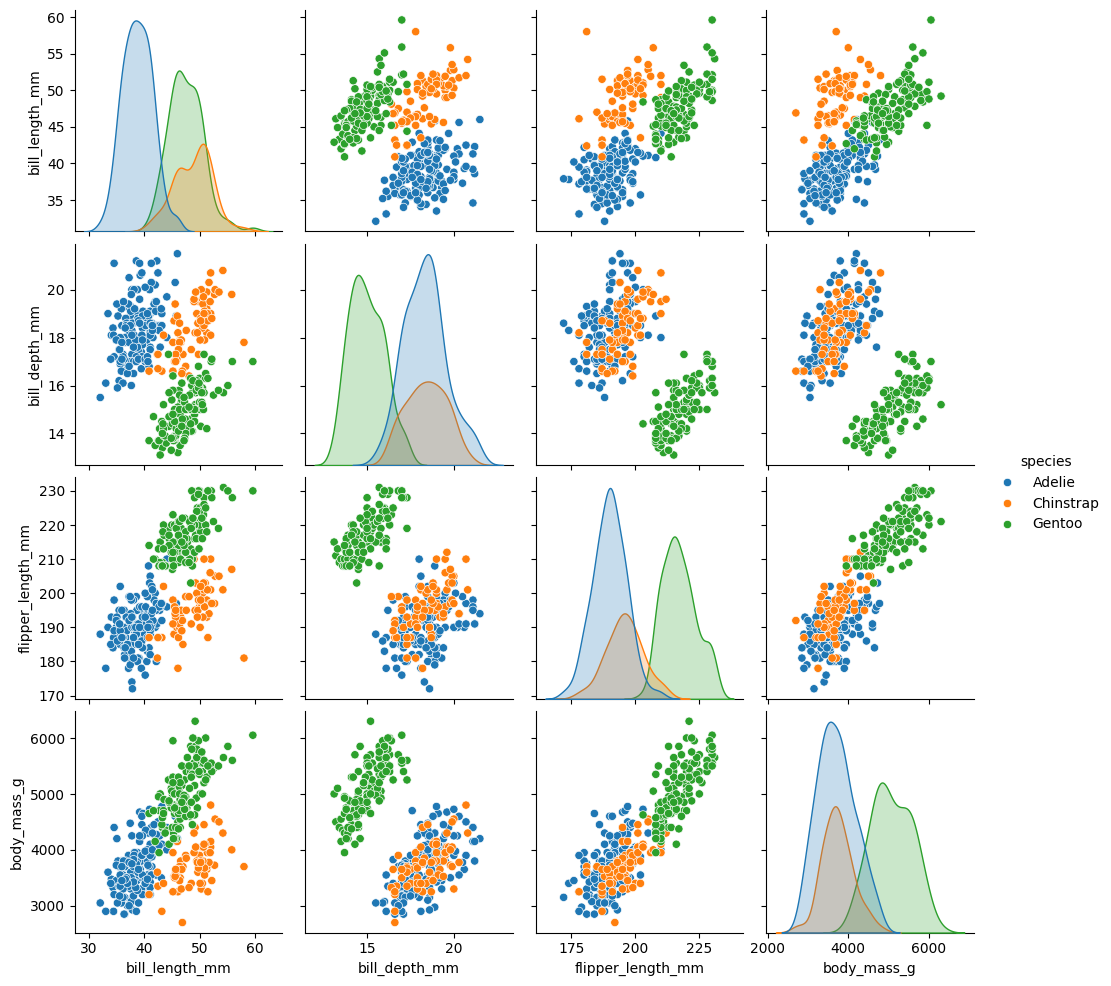

In [12]:
sns.pairplot(df , hue = 'species')

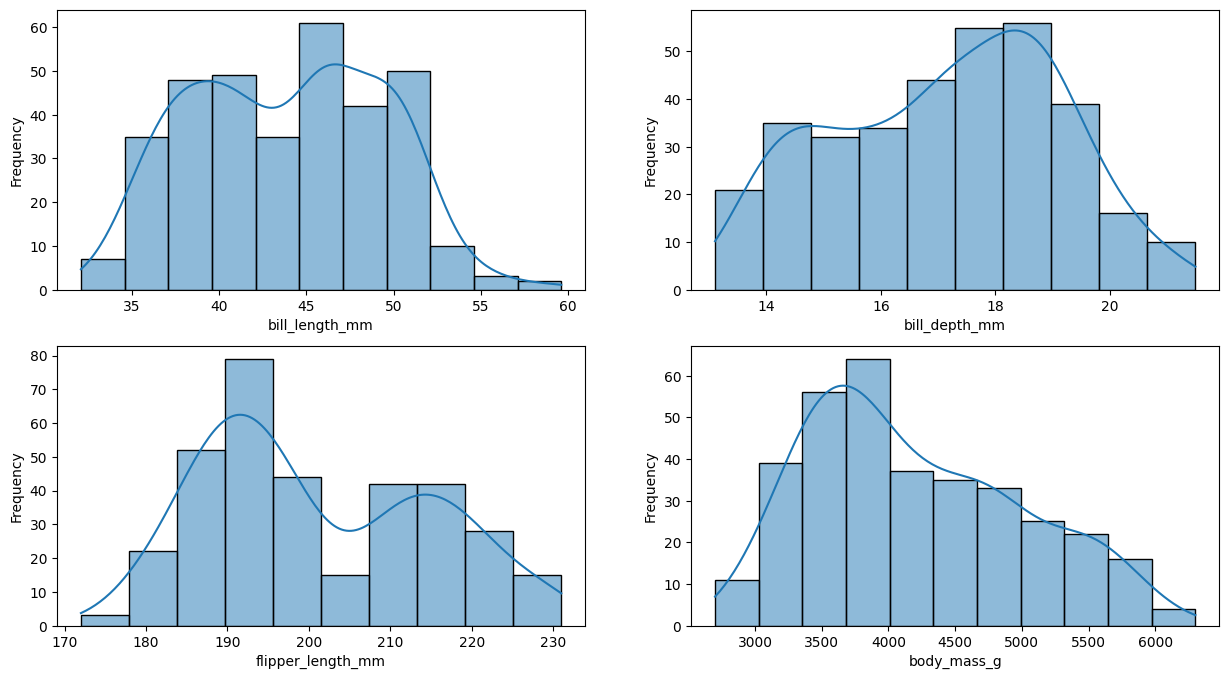

In [13]:

numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    sns.histplot(df[column], kde=True, ax=axes[row, col])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')


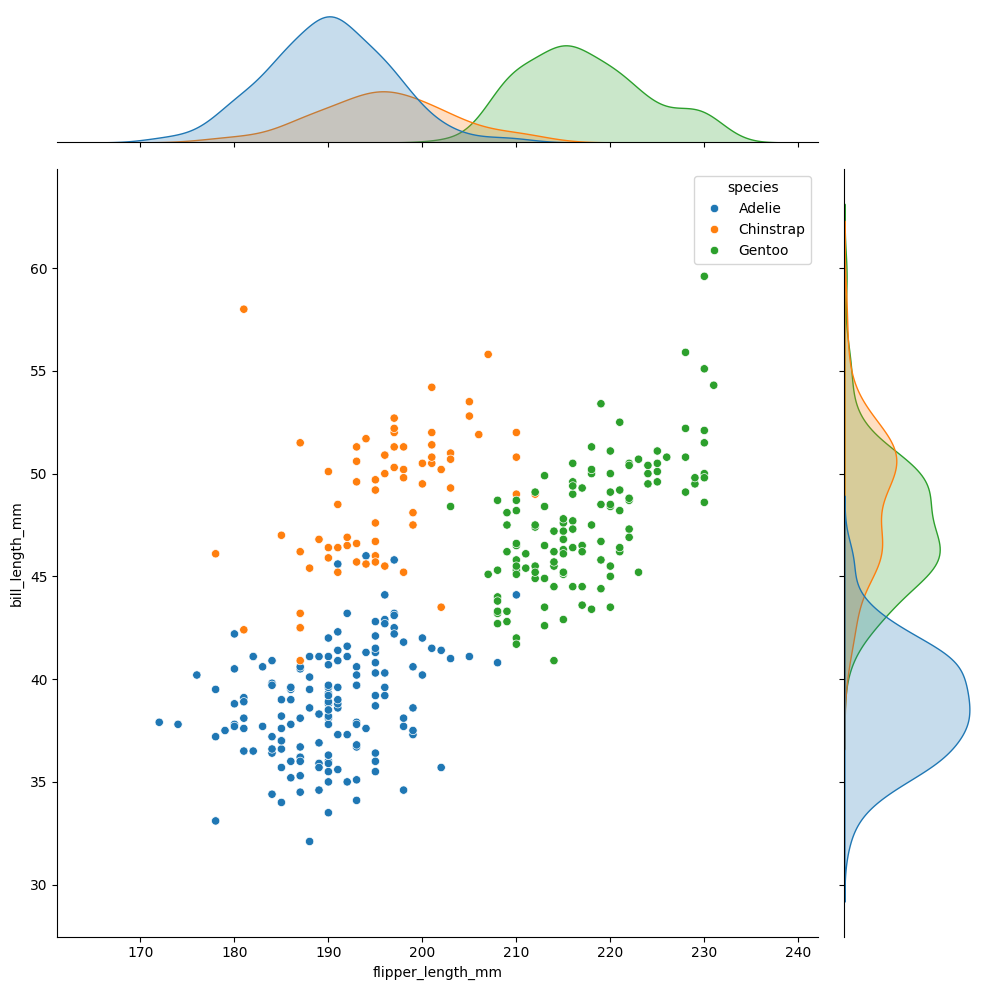

In [14]:
sns.jointplot(
    data=df, x="flipper_length_mm", y="bill_length_mm", hue="species", height=10
)

In [15]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Data Quality

In [16]:
print(df.isnull().sum())
print("The size of the dataset", df.shape)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
The size of the dataset (344, 7)


In [17]:
df.duplicated().value_counts()

False    344
Name: count, dtype: int64

In [18]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [19]:
def corr_table(df):
    df_copy = df.copy()

    label_encoder = LabelEncoder()

    df_copy['species_encoded'] = label_encoder.fit_transform(df_copy['species'])
    df_copy['island_encoded'] = label_encoder.fit_transform(df_copy['island'])
    df_copy['sex_encoded'] = label_encoder.fit_transform(df_copy['sex'])

    df_copy.drop(['sex','island', 'species'],axis=1,inplace=True)

    return df_copy.corr()
corr_table(df)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_encoded,island_encoded,sex_encoded
bill_length_mm,1.000000,-0.235053,0.656181,0.595110,0.731369,-0.353647,0.271440
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,-0.744076,0.571035,0.311460
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.854307,-0.565825,0.215992
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.750491,-0.561515,0.361224
species_encoded,0.731369,-0.744076,0.854307,0.750491,1.000000,-0.635659,0.008559
island_encoded,-0.353647,0.571035,-0.565825,-0.561515,-0.635659,1.000000,0.029246
sex_encoded,0.271440,0.311460,0.215992,0.361224,0.008559,0.029246,1.000000


In [20]:
df.loc[df['flipper_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


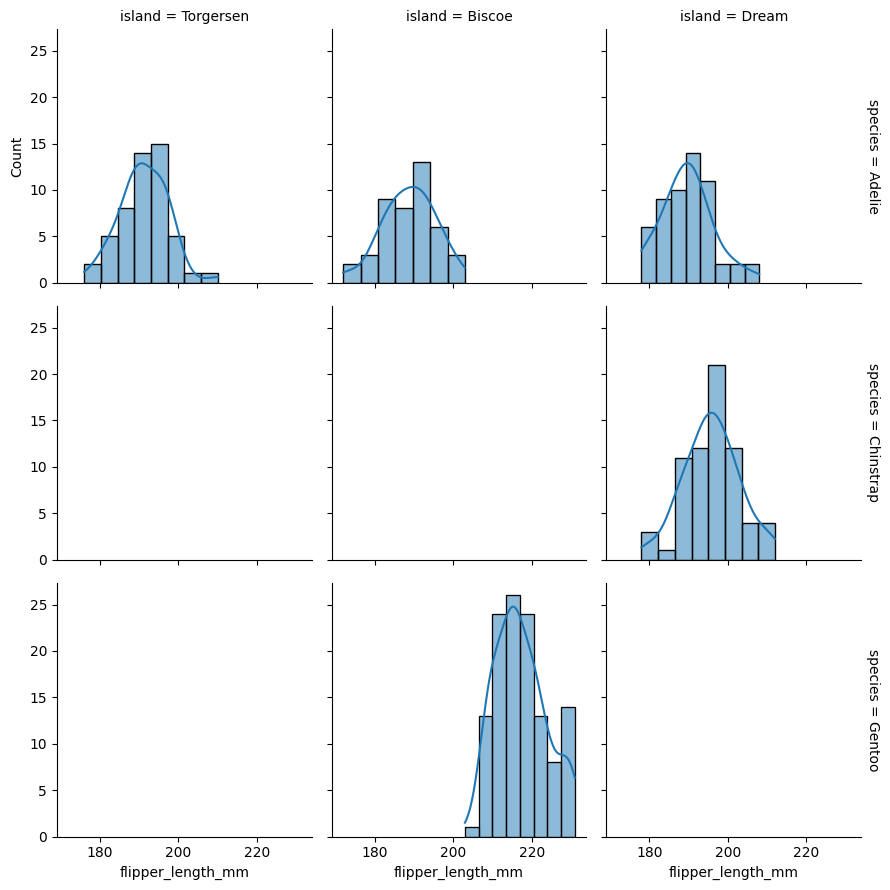

In [21]:

g = sns.FacetGrid(df, col="island", row="species", margin_titles=True)
g.map(sns.histplot, "flipper_length_mm", kde=True)
plt.show()

In [22]:
mean_values = df.groupby(['island', 'species'])['flipper_length_mm'].mean()
mean_dict  = mean_values.to_dict()
mean_values


island     species  
Biscoe     Adelie       188.795455
           Gentoo       217.186992
Dream      Adelie       189.732143
           Chinstrap    195.823529
Torgersen  Adelie       191.196078
Name: flipper_length_mm, dtype: float64

In [23]:
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df.apply(lambda row: mean_dict .get((row['island'], row['species']), row['flipper_length_mm']), axis=1), inplace=False)

In [24]:
df['flipper_length_mm']

0      181.000000
1      186.000000
2      195.000000
3      191.196078
4      193.000000
          ...    
339    217.186992
340    215.000000
341    222.000000
342    212.000000
343    213.000000
Name: flipper_length_mm, Length: 344, dtype: float64

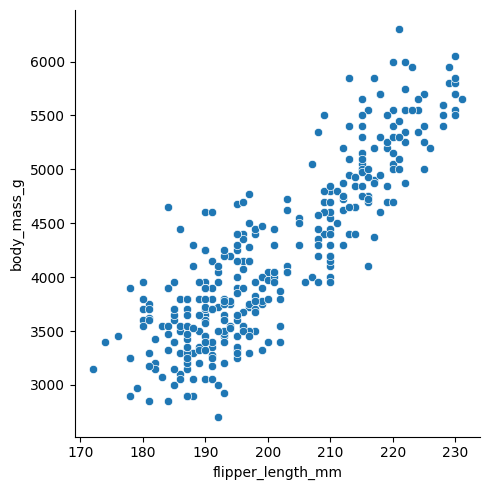

In [25]:
sns.relplot(data = df, x = 'flipper_length_mm', y = 'body_mass_g')

In [26]:

def fill_nan(df_orig, x, y):
    df = df_orig.copy()
    df_missing = df[df[y].isna()]
    
    if len(df_missing) == 0:
        return df
    
    df_not_missing = df[~df[y].isna()]
    
    
    iqr1 = df_not_missing[x].quantile(0.25)
    
    train = df_not_missing[(df_not_missing[x] > iqr1)]
    
    model = LinearRegression()
    model.fit(train[[x]], train[y])

    x_missing = df_missing[[x]]
    df.loc[df[y].isna(), y] = model.predict(x_missing)
    return df

In [27]:
df = fill_nan(df, 'flipper_length_mm', 'body_mass_g')

In [28]:
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64


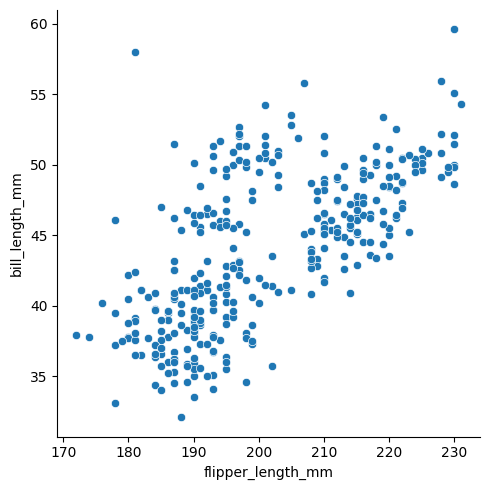

In [29]:
sns.relplot(data = df, x = 'flipper_length_mm', y = 'bill_length_mm')

In [30]:
df = fill_nan(df, 'flipper_length_mm', 'bill_length_mm')

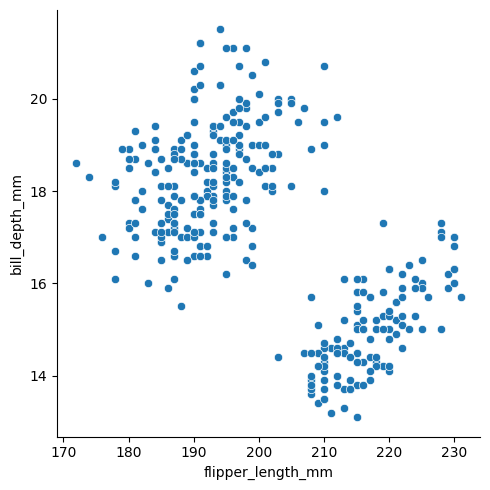

In [31]:
sns.relplot(data = df, x = 'flipper_length_mm', y = 'bill_depth_mm')

In [32]:

def draw_cluster(df, x_col, y_col):
    plt.figure(figsize=(10, 6))
    print(len(df['flipper_length_mm']))
    model = KMeans(n_clusters=2, random_state=42).fit(df[[x_col]])
    df['cluster'] = model.labels_

    iqr1 = df.groupby('cluster')[x_col].quantile(0.60)

    for cluster in df['cluster'].unique():
        df_cluster = df[(df['cluster'] == cluster) & (df[x_col] > iqr1[cluster])]
        sns.regplot(data=df_cluster, x=x_col, y=y_col, scatter=False, label=f'Cluster {cluster} Line')
        
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='cluster', palette='deep')

    plt.legend()
    plt.show()
    cetners = sorted(model.cluster_centers_.flatten())

    threshold1 = (cetners[0] + cetners[1]) / 2
    return threshold1


344


C:\Users\Watani Mall\Desktop\Ai-Lab\Third Lab\third_lab\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


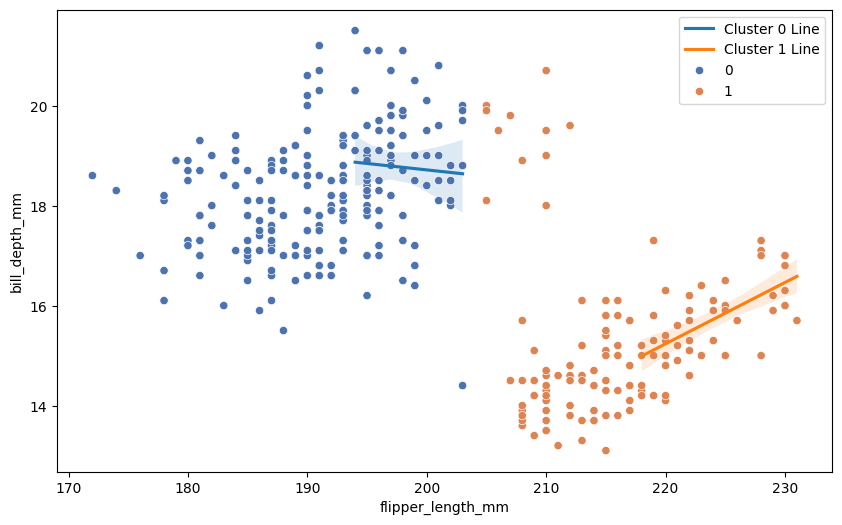

In [33]:
threshold1 = draw_cluster(df, 'flipper_length_mm', 'bill_depth_mm')

In [37]:
df = df.drop('cluster', axis=1)

In [38]:

df_s1 = df[df['flipper_length_mm'] <= threshold1]
df_s2 = df[df['flipper_length_mm'] > threshold1]
df_s1 = fill_nan(df_s1, 'flipper_length_mm', 'bill_depth_mm')
df_s2 = fill_nan(df_s2, 'flipper_length_mm', 'bill_depth_mm')
df = pd.concat([df_s1, df_s2]).sort_index().reset_index(drop=True)

In [39]:
print(df.isnull().sum())

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64


In [41]:

df_copy = df.copy()

label_encoder = LabelEncoder()
df_copy['species_encoded'] = label_encoder.fit_transform(df_copy['species'])
df_copy['island_encoded'] = label_encoder.fit_transform(df_copy['island'])

train_data = df_copy[df_copy['sex'].notna()]
predict_data = df_copy[df_copy['sex'].isna()]

label_encoder_sex = LabelEncoder()
train_labels = label_encoder_sex.fit_transform(train_data['sex'])

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_data[['species_encoded', 'island_encoded']], train_labels)

predicted_sex = knn.predict(predict_data[['species_encoded', 'island_encoded']])

predicted_sex_decoded = label_encoder_sex.inverse_transform(predicted_sex)

df.loc[df['sex'].isna(), 'sex'] = predicted_sex_decoded


In [42]:
print(df.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


## Outliers

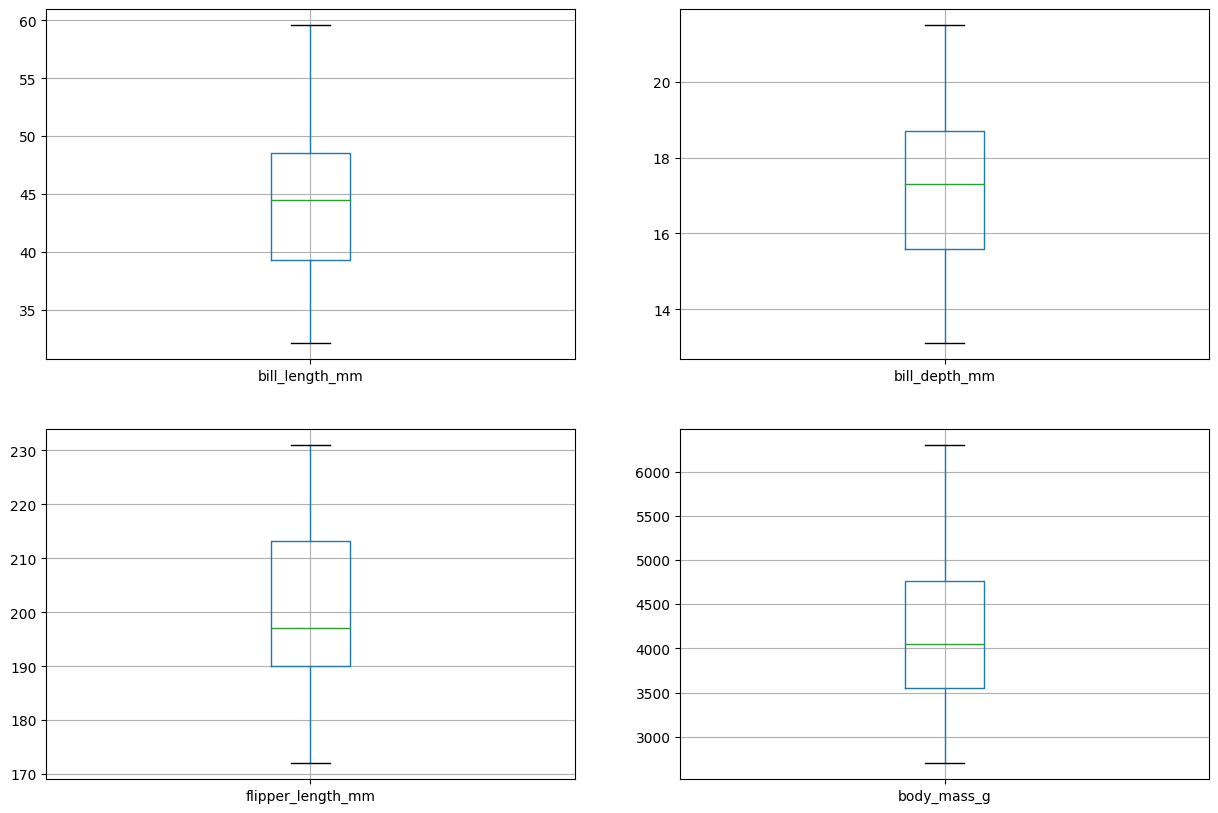

In [43]:
n_cols = 2 
n_rows = (len(numerical_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    df.boxplot(column=column, ax=axes[i])

In [44]:
for i, column in enumerate(['bill_length_mm', 'bill_depth_mm']):

    mean = df[column].mean()
    std = df[column].std()
    print(f"For the height feature, the mean = {mean} and standard deviaton = {std} ")
    
    LowerZScore_bmi = mean - 2.5*std
    UpperZScore_bmi = mean + 2.5*std
    print(f"Lower Z-Score = {LowerZScore_bmi}, and Upper Z-Score = {UpperZScore_bmi} for {column}")
    NumRecordsBefore = df.shape[0]
    df = df[(df[column] >= LowerZScore_bmi) & (df[column] <= UpperZScore_bmi)]
    NumRecordsAfter = df.shape[0]
    DroppedRecords = NumRecordsBefore - NumRecordsAfter
    print('Deleted Rows Number', DroppedRecords)

For the height feature, the mean = 43.92950762547964 and standard deviaton = 5.448640565245511 
Lower Z-Score = 30.307906212365857, and Upper Z-Score = 57.55110903859342 for bill_length_mm
Deleted Rows Number 2
For the height feature, the mean = 17.147197031102248 and standard deviaton = 1.9789876536674929 
Lower Z-Score = 12.199727896933517, and Upper Z-Score = 22.09466616527098 for bill_depth_mm
Deleted Rows Number 0


In [45]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [46]:
for i, column in enumerate(['flipper_length_mm', 'body_mass_g']):
    lower = 5
    upper = 90
    
    min_column = df[column].quantile(lower / 100)
    max_column = df[column].quantile(upper / 100)
    NumRecordsBefore = df.shape[0]
    df[column] = df[column].apply(lambda x: min_column if x < min_column else (max_column if x > max_column else x))
    NumRecordsAfter = df.shape[0]
    DroppedRecords = NumRecordsBefore - NumRecordsAfter
    print('Deleted Rows Number', DroppedRecords)

Deleted Rows Number 0
Deleted Rows Number 0


In [47]:
df_cleaned = df

## Feature Selection

In [48]:
y = df_cleaned['island']
X = df_cleaned.drop('island', axis=1)

In [49]:
def scaling_X(X):
    X_encoded = pd.get_dummies(X, drop_first=True)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)
    return X_scaled

In [50]:
def random_forrest_split_inside(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [51]:
def random_forrest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [52]:
def threshold_selector(X_train, X_test, threshold = 1):
    selector = VarianceThreshold(threshold=threshold)
    X_train_variance = selector.fit_transform(X_train)
    X_test_variance = selector.transform(X_test)
    return X_train_variance, X_test_variance, selector.variances_

In [53]:
def threshold_selection(X, y, threshold = 1):
    X_scaled = scaling_X(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    X_train, X_test, variance_array = threshold_selector(X_train, X_test, threshold)
    accuracy_split_inside = random_forrest(X_train, X_test, y_train, y_test)
    return accuracy_split_inside, variance_array, X_train.shape[1]

In [82]:
df = df.dropna()
y = df['island']
X = df.drop('island', axis=1)
X_scaled = scaling_X(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, variance_array = threshold_selector(X_train, X_test, 1)
accuracy_split_inside = random_forrest(X_train, X_test, y_train, y_test)
print(accuracy_split_inside)

0.6417910447761194


In [83]:
y = df_cleaned['island']
X = df_cleaned.drop('island', axis=1)
X_scaled = scaling_X(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, variance_array = threshold_selector(X_train, X_test, 1)
accuracy_split_inside = random_forrest(X_train, X_test, y_train, y_test)
print(accuracy_split_inside)

0.6231884057971014


In [56]:
df_cleaned.shape

(342, 7)

In [57]:
X_scaled = scaling_X(X)
random_forrest_split_inside(X_scaled, y)

0.6376811594202898

In [59]:
for i in [0.1, 1, 1.01, 1.02, 1.03]:
    print(threshold_selection(X, y, i))
    print("*****************")

(0.6376811594202898, array([1.02306835, 1.03642644, 1.01905115, 0.99671731, 1.02126537,
       1.01210953, 1.00042665]), 7)
*****************
(0.6231884057971014, array([1.02306835, 1.03642644, 1.01905115, 0.99671731, 1.02126537,
       1.01210953, 1.00042665]), 6)
*****************
(0.5942028985507246, array([1.02306835, 1.03642644, 1.01905115, 0.99671731, 1.02126537,
       1.01210953, 1.00042665]), 5)
*****************
(0.6086956521739131, array([1.02306835, 1.03642644, 1.01905115, 0.99671731, 1.02126537,
       1.01210953, 1.00042665]), 3)
*****************
(0.6086956521739131, array([1.02306835, 1.03642644, 1.01905115, 0.99671731, 1.02126537,
       1.01210953, 1.00042665]), 1)
*****************


In [60]:
def SelectKBest_selector(X, y, clf = mutual_info_classif, k = 3):
    selector = SelectKBest(score_func=clf, k=k)
    X_new = selector.fit_transform(X, y)
    selected_feature_indices = selector.get_support(indices=True)
    return X_new, selected_feature_indices

In [61]:
def SelectKBest_selection(X, y, clf = mutual_info_classif, k = 3):
    X_scaled = scaling_X(X)
    X_new, selected_feature_indices = SelectKBest_selector(X_scaled, y, clf, k)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    accuracy_split_inside = random_forrest(X_train, X_test, y_train, y_test)
    return accuracy_split_inside, selected_feature_indices

In [62]:
for k in range(1, 8):
    acc, features = SelectKBest_selection(X, y, k = k)
    print(f"For {k} features the accuracy {acc} with features {features}")

For 1 features the accuracy 0.6376811594202898 with features [5]
For 2 features the accuracy 0.6376811594202898 with features [1 5]
For 3 features the accuracy 0.6086956521739131 with features [1 4 5]
For 4 features the accuracy 0.6231884057971014 with features [1 2 4 5]
For 5 features the accuracy 0.6231884057971014 with features [1 2 3 4 5]
For 6 features the accuracy 0.6521739130434783 with features [0 1 2 3 4 5]
For 7 features the accuracy 0.6376811594202898 with features [0 1 2 3 4 5 6]


In [63]:
def cross_val_score_selection(X, y, clf=RandomForestClassifier(random_state=0), cv=5):
    X_scaled = scaling_X(X)
    scores = cross_val_score(clf, X_scaled, y, cv=cv)
    return scores.mean(), scores

In [68]:
for cv in range(2,6):
    acc, scores = cross_val_score_selection(X, y, cv=cv)
    print(f"For cv = {cv} accuracy is {acc} and scores {scores}")

For cv = 2 accuracy is 0.6286549707602339 and scores [0.41520468 0.84210526]
For cv = 3 accuracy is 0.6257309941520468 and scores [0.25438596 0.78070175 0.84210526]
For cv = 4 accuracy is 0.6504787961696307 and scores [0.19767442 0.63953488 0.88235294 0.88235294]
For cv = 5 accuracy is 0.639386189258312 and scores [0.1884058  0.42028986 0.82352941 0.88235294 0.88235294]


In [69]:
from sklearn.feature_selection import f_classif
for k in range(1, 8):
    acc, features = SelectKBest_selection(X, y,clf=f_classif, k = k)
    print(f"For {k} features the accuracy {acc} with features {features}")


For 1 features the accuracy 0.6376811594202898 with features [5]
For 2 features the accuracy 0.6376811594202898 with features [4 5]
For 3 features the accuracy 0.6521739130434783 with features [3 4 5]
For 4 features the accuracy 0.6376811594202898 with features [1 3 4 5]
For 5 features the accuracy 0.6231884057971014 with features [1 2 3 4 5]
For 6 features the accuracy 0.6521739130434783 with features [0 1 2 3 4 5]
For 7 features the accuracy 0.6376811594202898 with features [0 1 2 3 4 5 6]


## Features Reduction

In [70]:
!pip install feature_engine

In [71]:

df_new = df.copy()
disc = EqualFrequencyDiscretiser(q=10, variables=['bill_length_mm', 'bill_depth_mm'])
df_new[['bill_length_mm', 'bill_depth_mm']] = disc.fit_transform(df_new[['bill_length_mm', 'bill_depth_mm']])

In [72]:
kbin_disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df_new[['flipper_length_mm', 'body_mass_g']] = kbin_disc.fit_transform(df_new[['flipper_length_mm', 'body_mass_g']])


C:\Users\Watani Mall\Desktop\Ai-Lab\Third Lab\third_lab\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [73]:
from sklearn.preprocessing import LabelEncoder

features = ['island', 'species', 'sex']

label_encoder = LabelEncoder()
for feature in features:
    df_new[feature] = label_encoder.fit_transform(df_new[feature])
df_new.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,2,7,0.0,2.0,1
1,0,2,2,5,1.0,2.0,0
2,0,2,3,6,3.0,0.0,0
3,0,2,4,6,2.0,1.0,0
4,0,2,1,8,3.0,1.0,0


In [74]:
y = df_new['island']
X = df_new.drop('island', axis=1)

random_forrest_split_inside(X, y)

0.6086956521739131

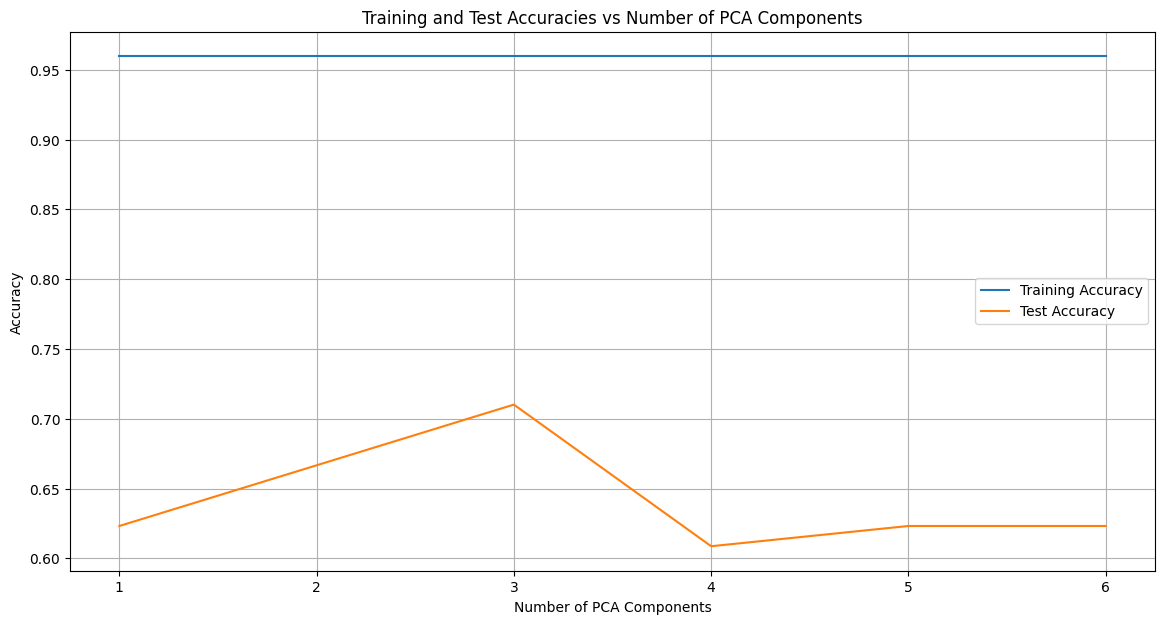

In [75]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_accuracies = []
test_accuracies = []

for n_components in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_pca, y_train)
    
    y_train_pred = clf.predict(X_train_pca)
    y_test_pred = clf.predict(X_test_pca)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

n_features = list(range(1, X_train.shape[1] + 1))
plt.figure(figsize=(14, 7))
plt.plot(n_features, train_accuracies, label='Training Accuracy')
plt.plot(n_features, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies vs Number of PCA Components')
plt.legend()
plt.grid(True)
plt.show()


In [76]:
df = sns.load_dataset('penguins')

In [85]:
def preprocess_and_split(df):
    y = df['island']
    X = df.drop('island', axis=1)
    X_scaled = scaling_X(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [86]:
def apply_pca(X_train, X_test, n_components=None):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

In [91]:
# List of different thresholds
thresholds = [0.1, 1, 1.01]

def test_cases_variance_threshold(df, threshold):
    X_train, X_test, y_train, y_test = preprocess_and_split(df)

    # Without VarianceThreshold, Without PCA
    accuracy_1 = random_forrest(X_train, X_test, y_train, y_test)

    # With VarianceThreshold, Without PCA
    X_train_vt, X_test_vt, _ = threshold_selector(X_train, X_test, threshold)
    accuracy_2 = random_forrest(X_train_vt, X_test_vt, y_train, y_test)

    # Without VarianceThreshold, With PCA
    X_train_pca, X_test_pca = apply_pca(X_train, X_test)
    accuracy_3 = random_forrest(X_train_pca, X_test_pca, y_train, y_test)

    # With VarianceThreshold, With PCA
    X_train_vt_pca, X_test_vt_pca = apply_pca(X_train_vt, X_test_vt)
    accuracy_4 = random_forrest(X_train_vt_pca, X_test_vt_pca, y_train, y_test)

    return accuracy_1, accuracy_2, accuracy_3, accuracy_4

# DataFrames to store the results
results_df = pd.DataFrame()
results_df_cleaned = pd.DataFrame()

# Loop over the different thresholds
for threshold in thresholds:
    accuracies_df = test_cases_variance_threshold(df, threshold)
    accuracies_df_cleaned = test_cases_variance_threshold(df_cleaned, threshold)

    results_df[threshold] = accuracies_df
    results_df_cleaned[threshold] = accuracies_df_cleaned

# Set case names
case_names = ['Without VT & PCA', 'With VT, Without PCA', 'Without VT, With PCA', 'With VT & PCA']
results_df['Case'] = case_names
results_df_cleaned['Case'] = case_names

# Reorder columns to have 'Case' as the first column
results_df = results_df[['Case'] + thresholds]
results_df_cleaned = results_df_cleaned[['Case'] + thresholds]

# Display the DataFrames
print("Results for df:")
print(results_df)

print("\nResults for df_cleaned:")
print(results_df_cleaned)


Results for df:
                   Case       0.1       1.0      1.01
0      Without VT & PCA  0.626866  0.626866  0.626866
1  With VT, Without PCA  0.626866  0.641791  0.567164
2  Without VT, With PCA  0.641791  0.641791  0.641791
3         With VT & PCA  0.641791  0.626866  0.567164

Results for df_cleaned:
                   Case       0.1       1.0      1.01
0      Without VT & PCA  0.637681  0.637681  0.637681
1  With VT, Without PCA  0.637681  0.623188  0.594203
2  Without VT, With PCA  0.652174  0.652174  0.652174
3         With VT & PCA  0.652174  0.652174  0.623188


In [93]:
# List of different values for k
k_values = [1, 2, 3, 4, 5, 6]

# Function to test cases with SelectKBest
def test_cases_SelectBestK(df, clf, k):
    X_train, X_test, y_train, y_test = preprocess_and_split(df)
    y = df['island']
    X = df.drop('island', axis=1)
    X_scaled = scaling_X(X)
    X_selector, _ = SelectKBest_selector(X_scaled, y, clf, k)
    X_train_selector, X_test_selector, y_train_selector, y_test_selector = train_test_split(X_selector, y, test_size=0.2, random_state=42)

    # With SelectBestK, Without PCA
    accuracy_1 = random_forrest(X_train_selector, X_test_selector, y_train_selector, y_test_selector)

    # Without SelectBestK, With PCA
    X_train_pca, X_test_pca = apply_pca(X_train, X_test)
    accuracy_2 = random_forrest(X_train_pca, X_test_pca, y_train, y_test)

    # With SelectBestK, With PCA
    X_train_selector_pca, X_test_selector_pca = apply_pca(X_train_selector, X_test_selector)
    accuracy_3 = random_forrest(X_train_selector_pca, X_test_selector_pca, y_train_selector, y_test_selector)

    return accuracy_1, accuracy_2, accuracy_3

# DataFrames to store the results
results_df = pd.DataFrame()
results_df_cleaned = pd.DataFrame()

# Loop over the different values of k
for k_value in k_values:
    accuracies_df = test_cases_SelectBestK(df, mutual_info_classif, k_value)
    accuracies_df_cleaned = test_cases_SelectBestK(df_cleaned, mutual_info_classif, k_value)

    results_df[k_value] = accuracies_df
    results_df_cleaned[k_value] = accuracies_df_cleaned

# Set case names
case_names = ['With SelectBestK, Without PCA', 'Without SelectBestK, With PCA', 'With SelectBestK, With PCA']
results_df['Case'] = case_names
results_df_cleaned['Case'] = case_names

# Reorder columns to have 'Case' as the first column
results_df = results_df[['Case'] + k_values]
results_df_cleaned = results_df_cleaned[['Case'] + k_values]

# Display the DataFrames
print("Results for df:")
print(results_df)

print("\nResults for df_cleaned:")
print(results_df_cleaned)


Results for df:
                            Case         1         2         3         4  \
0  With SelectBestK, Without PCA  0.641791  0.597015  0.626866  0.597015   
1  Without SelectBestK, With PCA  0.641791  0.641791  0.641791  0.641791   
2     With SelectBestK, With PCA  0.641791  0.567164  0.567164  0.671642   

          5         6  
0  0.641791  0.611940  
1  0.641791  0.641791  
2  0.641791  0.626866  

Results for df_cleaned:
                            Case         1         2         3         4  \
0  With SelectBestK, Without PCA  0.637681  0.637681  0.608696  0.637681   
1  Without SelectBestK, With PCA  0.652174  0.652174  0.652174  0.652174   
2     With SelectBestK, With PCA  0.637681  0.637681  0.507246  0.695652   

          5         6  
0  0.623188  0.652174  
1  0.652174  0.652174  
2  0.623188  0.666667  


In [101]:
df.shape

(333, 7)

In [ ]:
def SelectKBest_selector(X, y, clf = mutual_info_classif, k = 3):
    selector = SelectKBest(score_func=clf, k=k)
    X_new = selector.fit_transform(X, y)
    selected_feature_indices = selector.get_support(indices=True)
    return X_new, selected_feature_indices

In [95]:
# DataFrames to store the results
results_df = pd.DataFrame()
results_df_cleaned = pd.DataFrame()

# Loop over the different values of k
for k_value in k_values:
    accuracies_df = test_cases_SelectBestK(df, f_classif, k_value)
    accuracies_df_cleaned = test_cases_SelectBestK(df_cleaned, f_classif, k_value)

    results_df[k_value] = accuracies_df
    results_df_cleaned[k_value] = accuracies_df_cleaned

# Set case names
case_names = ['With SelectBestK, Without PCA', 'Without SelectBestK, With PCA', 'With SelectBestK, With PCA']
results_df['Case'] = case_names
results_df_cleaned['Case'] = case_names

# Reorder columns to have 'Case' as the first column
results_df = results_df[['Case'] + k_values]
results_df_cleaned = results_df_cleaned[['Case'] + k_values]

# Display the DataFrames
print("Results for df:")
print(results_df)

print("\nResults for df_cleaned:")
print(results_df_cleaned)

Results for df:
                            Case         1         2         3         4  \
0  With SelectBestK, Without PCA  0.641791  0.641791  0.656716  0.641791   
1  Without SelectBestK, With PCA  0.641791  0.641791  0.641791  0.641791   
2     With SelectBestK, With PCA  0.641791  0.641791  0.626866  0.626866   

          5         6  
0  0.641791  0.611940  
1  0.641791  0.641791  
2  0.641791  0.626866  

Results for df_cleaned:
                            Case         1         2         3         4  \
0  With SelectBestK, Without PCA  0.637681  0.637681  0.652174  0.637681   
1  Without SelectBestK, With PCA  0.652174  0.652174  0.652174  0.652174   
2     With SelectBestK, With PCA  0.637681  0.637681  0.652174  0.695652   

          5         6  
0  0.623188  0.652174  
1  0.652174  0.652174  
2  0.623188  0.666667  


In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Different values for cv (number of folds)
cv_values = [3, 5, 7, 10]

# Function to test cases with cross-validation
def test_cases_cross_val_score(df, clf, cv):
    y = df['island']
    X = df.drop('island', axis=1)

    # Cross-validation score
    mean_score, _ = cross_val_score_selection(X, y, clf, cv)
    return mean_score

# DataFrames to store the results
results_cv_df = pd.DataFrame()
results_cv_df_cleaned = pd.DataFrame()

# Loop over the different values of cv
for cv_value in cv_values:
    mean_score_df = test_cases_cross_val_score(df, RandomForestClassifier(random_state=0), cv_value)
    mean_score_df_cleaned = test_cases_cross_val_score(df_cleaned, RandomForestClassifier(random_state=0), cv_value)

    results_cv_df[cv_value] = [mean_score_df]
    results_cv_df_cleaned[cv_value] = [mean_score_df_cleaned]

# Set row names
row_names = ['Cross-Validation Score']
results_cv_df['Metric'] = row_names
results_cv_df_cleaned['Metric'] = row_names

# Reorder columns to have 'Metric' as the first column
results_cv_df = results_cv_df[['Metric'] + cv_values]
results_cv_df_cleaned = results_cv_df_cleaned[['Metric'] + cv_values]

# Display the DataFrames
print("Results for df with Cross-Validation:")
print(results_cv_df)

print("\nResults for df_cleaned with Cross-Validation:")
print(results_cv_df_cleaned)


Results for df with Cross-Validation:
                   Metric         3         5        7       10
0  Cross-Validation Score  0.624625  0.655948  0.64482  0.67344

Results for df_cleaned with Cross-Validation:
                   Metric         3         5         7       10
0  Cross-Validation Score  0.625731  0.639386  0.646927  0.66916
